# Integrated Modules [ ML, OCR, CA, SQL, Environment Data ]

In [19]:
import time
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm
%matplotlib inline
import imutils
import easyocr

#from keras.models import load_model
cnn = tf.keras.models.load_model('CNN_Multi_Class.h5')

# INITIATE values
global saved_value_index, value, END_REVENUE, END_no_TRANSACTIONS #, temp_saved_value_index
global overall_excemption_occured_or_not
# List
saved_value_index = [4, 3, 8, 2, 3, 13, 21]
#saved_value_index = [2, 1, 0, 0, 0, 0, 0]
# Tuple
value = (2000, 500, 200, 100, 50, 20, 10)
#temp_saved_value_index = saved_value_index
END_REVENUE = int(0)
END_no_TRANSACTIONS = int(0)

#import pytesseract
#pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

# DB

In [4]:
# bill counter
global saved_value_index, value, END_REVENUE, END_no_TRANSACTIONS #, temp_saved_value_index
saved_value_index = [4, 3, 8, 2, 3, 13, 21]
#saved_value_index = [2, 1, 0, 0, 0, 0, 0]
value = (2000, 500, 200, 100, 50, 20, 10)
END_REVENUE = int(0)
END_no_TRANSACTIONS = int(0)

def random_seed_SNO(saved_value_index):
    print("hahaha",saved_value_index)
    seed_column_name = ['TwoThousand', 'FiveHundred', 'TwoHundred', 'Hundred', 'Fifty', 'Twenty', 'Ten']
    numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
    characters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",]
    
    consolidated_random_created_SNO_container = []
    consolidated_SNO_value_map_container = []
    
    for saved_value_index_length in range(len(saved_value_index)):
        for iteration_index_value in range(saved_value_index[saved_value_index_length]):
            consolidated_SNO_value_map_container.append(seed_column_name[saved_value_index_length])
            sno = ""
            for i in range(9):
                if i == 1 or i == 2:
                    temp = random.choice(characters)
                else:
                    temp = random.choice(numbers)
                sno = sno + str(temp)
            consolidated_random_created_SNO_container.append(sno)
    #print(consolidated_random_created_SNO_container)
    #print(consolidated_SNO_value_map_container)
    return consolidated_random_created_SNO_container, consolidated_SNO_value_map_container

Random_SEED_SNO_value, Random_SEED_SNO_map_value = random_seed_SNO(saved_value_index)


# environment data
global SUSPECT_IMAGE_NUMBER, SUSPECT_IMAGE_ADDRESS
SUSPECT_IMAGE_NUMBER = 0
SUSPECT_IMAGE_ADDRESS = ""

# SQL
import mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="kevindaniel",
  password="123456789"
)
mycursor = mydb.cursor()
#mycursor.execute("CREATE DATABASE mydatabase")
mydb = mysql.connector.connect(
  host="localhost",
  user="kevindaniel",
  password="123456789",
  database="mydatabase"
)
mycursor = mydb.cursor()

# LEGITIMATE
mycursor.execute("CREATE TABLE trial (ROW_NO int NOT NULL AUTO_INCREMENT, TwoThousand VARCHAR(255), FiveHundred VARCHAR(255), TwoHundred VARCHAR(255), Hundred VARCHAR(255), Fifty VARCHAR(255), Twenty VARCHAR(255), Ten VARCHAR(255), PRIMARY KEY (ROW_NO))")

# ILLICIT
mycursor.execute("CREATE TABLE trial_illicit (ROW_NO int NOT NULL AUTO_INCREMENT, TwoThousand VARCHAR(255), FiveHundred VARCHAR(255), TwoHundred VARCHAR(255), Hundred VARCHAR(255), Fifty VARCHAR(255), Twenty VARCHAR(255), Ten VARCHAR(255), PRIMARY KEY (ROW_NO))")

# TRANSACTION RECORD
mycursor.execute("CREATE TABLE Transation_log (ROW_NO int NOT NULL AUTO_INCREMENT, Location VARCHAR(255), Date VARCHAR(255), Time VARCHAR(255), BillValue_ByMerchant INT, TotalValue_ByCustomer INT, ImageAddress VARCHAR(255), SuspeciousCondition VARCHAR(255), StollenSerialNumberFound VARCHAR(255), TransactionState VARCHAR(255), PRIMARY KEY (ROW_NO))")

# For Legitimate table
global SQL_data_insertion_log, SQL_total_row_count
SQL_data_insertion_log = [0, 0, 0, 0, 0, 0, 0] #PER COLUMN
SQL_total_row_count = 0                        #OVERALL ROW

# For Transaction Table
Transaction_Log_Column_Name = ["Location", "Date", "Time", "BillValue_ByMerchant", "TotalValue_ByCustomer", "ImageAddress", "SuspeciousCondition", "StollenSerialNumberFound", "TransactionState"]
str_Transaction_Log_Column_Name = ""
for i in range(len(Transaction_Log_Column_Name)):
    if i==8:
        str_Transaction_Log_Column_Name = (str_Transaction_Log_Column_Name + str(Transaction_Log_Column_Name[i]))        
    else:
        str_Transaction_Log_Column_Name = (str_Transaction_Log_Column_Name + str(Transaction_Log_Column_Name[i] + ", "))
        
print(str_Transaction_Log_Column_Name)

global TOTAL_NO_of_RECORD_in_TRANSACTION_LOG
TOTAL_NO_of_RECORD_in_TRANSACTION_LOG = 0

global SUSPECT_IMAGE_NUMBER
SUSPECT_IMAGE_NUMBER = 0
def ENVIRONMENT_DATA_GATHERING(suspect_condition):
    def location():
        shop_code = "001"
        area = "Kolathur"
        district = "Chennai"
        state = "TamilNadu"
        pin = "600099"
        address_location = shop_code + "|" + area + "|" + district + "|" + state + "|" + pin
        return address_location
        
    def date_time():
        initiate = datetime.now()
        current_date = initiate.strftime("%d:%m:%Y:%A")
        current_time = initiate.strftime("%H:%M:%S:%p")
        return current_date, current_time
    
    # IMAGE
    def image_capture():
        videoCaptureObject = cv2.VideoCapture(0)
        condition = True
        while(condition):
            ret,one_frame = videoCaptureObject.read()
            cv2.imwrite("Suspect_Image.jpg",one_frame)
            condition = False
        videoCaptureObject.release()
        cv2.destroyAllWindows()
        os.remove("C:/Users/kevin/Suspect_Image.jpg")    
        return one_frame
    
    def suspect_image_address(captured_image):
        global SUSPECT_IMAGE_NUMBER
        temp_image_address_holder = "C:/Users/kevin/Desktop/Project_Resources/TEST/SUSPECT_NO_" + str((SUSPECT_IMAGE_NUMBER)+1) + ".jpeg"
        cv2.imwrite(temp_image_address_holder, captured_image)
        SUSPECT_IMAGE_NUMBER = SUSPECT_IMAGE_NUMBER + 1
        SUSPECT_IMAGE_ADDRESS = ""
        SUSPECT_IMAGE_ADDRESS = temp_image_address_holder
        return SUSPECT_IMAGE_ADDRESS
    
    if suspect_condition == False:   
        date, time = date_time()
        address = location()
        return date, time, None, address, "None"
    
    elif suspect_condition == True:
        date, time = date_time()
        captured_image = image_capture()
        address = location()
        image_address = suspect_image_address(captured_image)
        return date, time, captured_image, address, image_address
    
def SQL_DATABASE_CONNECT(INPUT_SERIAL_NUMBER_PARAMETER, INPUT_DENOMINATION_PARAMETER, DISPENSED_PARAMETER):
    
    stollen_serialnumber_match_holder = [] # to hold stollen serial number
    def SQL_illicit_record(SNO, Denomination):
        STOLLEN_CONDITION = 0
        for i in range(len(Denomination)):
            mycursor.execute("SELECT " + str(Denomination[i]) + " FROM trial_illicit")
            myresult = mycursor.fetchall()
            for x in myresult:
                check_result = (x[0] == SNO[i])
                if check_result == True:
                    STOLLEN_CONDITION = STOLLEN_CONDITION + 1
                    stollen_serialnumber_match_holder.append([x[0], Denomination[i]])
                else:
                    pass
        return STOLLEN_CONDITION
    
    stollen_bank_notes = SQL_illicit_record(INPUT_SERIAL_NUMBER_PARAMETER, INPUT_DENOMINATION_PARAMETER)
    
    if stollen_bank_notes == 0:      
        def SQL_insert(SNO, DENOMINATION):
            global SQL_data_insertion_log, SQL_total_row_count
            for i in range(len(SNO)):
                if DENOMINATION[i] == 'TwoThousand':
                    if SQL_total_row_count == SQL_data_insertion_log[0]:
                        query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print("record inserted, ID:", mycursor.lastrowid)
                        SQL_data_insertion_log[0] = SQL_data_insertion_log[0] + 1
                        SQL_total_row_count = SQL_total_row_count + 1
            
                    else:
                        query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[0]+1)
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print(mycursor.rowcount, "record(s) affected")
                        SQL_data_insertion_log[0] = SQL_data_insertion_log[0] + 1
                        
                elif DENOMINATION[i] == 'FiveHundred':
                    if SQL_total_row_count == SQL_data_insertion_log[1]:
                        query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print("record inserted, ID:", mycursor.lastrowid)
                        SQL_data_insertion_log[1] = SQL_data_insertion_log[1] + 1
                        SQL_total_row_count = SQL_total_row_count + 1
            
                    else:
                        query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[1]+1)
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print(mycursor.rowcount, "record(s) affected")
                        SQL_data_insertion_log[1] = SQL_data_insertion_log[1] + 1
                        
                elif DENOMINATION[i] == 'TwoHundred':
                    if SQL_total_row_count == SQL_data_insertion_log[2]:
                        query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print("record inserted, ID:", mycursor.lastrowid)
                        SQL_data_insertion_log[2] = SQL_data_insertion_log[2] + 1
                        SQL_total_row_count = SQL_total_row_count + 1
            
                    else:
                        query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[2]+1)
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print(mycursor.rowcount, "record(s) affected")
                        SQL_data_insertion_log[2] = SQL_data_insertion_log[2] + 1
                        
                elif DENOMINATION[i] == 'Hundred':
                    if SQL_total_row_count == SQL_data_insertion_log[3]:
                        query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print("record inserted, ID:", mycursor.lastrowid)
                        SQL_data_insertion_log[3] = SQL_data_insertion_log[3] + 1
                        SQL_total_row_count = SQL_total_row_count + 1
            
                    else:
                        query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[3]+1)
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print(mycursor.rowcount, "record(s) affected")
                        SQL_data_insertion_log[3] = SQL_data_insertion_log[3] + 1
                        
                elif DENOMINATION[i] == 'Fifty':
                    if SQL_total_row_count == SQL_data_insertion_log[4]:
                        query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print("record inserted, ID:", mycursor.lastrowid)
                        SQL_data_insertion_log[4] = SQL_data_insertion_log[4] + 1
                        SQL_total_row_count = SQL_total_row_count + 1
            
                    else:
                        query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[4]+1)
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print(mycursor.rowcount, "record(s) affected")
                        SQL_data_insertion_log[4] = SQL_data_insertion_log[4] + 1
                        
                elif DENOMINATION[i] == 'Twenty':
                    if SQL_total_row_count == SQL_data_insertion_log[5]:
                        query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print("record inserted, ID:", mycursor.lastrowid)
                        SQL_data_insertion_log[5] = SQL_data_insertion_log[5] + 1
                        SQL_total_row_count = SQL_total_row_count + 1
            
                    else:
                        query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[5]+1)
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print(mycursor.rowcount, "record(s) affected")
                        SQL_data_insertion_log[5] = SQL_data_insertion_log[5] + 1
                        
                elif DENOMINATION[i] == 'Ten':
                    if SQL_total_row_count == SQL_data_insertion_log[6]:
                        query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print("record inserted, ID:", mycursor.lastrowid)
                        SQL_data_insertion_log[6] = SQL_data_insertion_log[6] + 1
                        SQL_total_row_count = SQL_total_row_count + 1
            
                    else:
                        query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[6]+1)
                        query_str = str(query)
                        mycursor.execute(query_str)
                        mydb.commit()
                        print(mycursor.rowcount, "record(s) affected")
                        SQL_data_insertion_log[6] = SQL_data_insertion_log[6] + 1
                else:
                    pass
                        
        
        global column_name
        column_name = ['TwoThousand', 'FiveHundred', 'TwoHundred', 'Hundred', 'Fifty', 'Twenty', 'Ten']
        
        def SQL_delete(delete):
            total_deletion = 0
            for i in range(len(delete)):
                total_deletion = total_deletion + delete[i]
            
            if total_deletion > 0:
                for i in range(len(delete)):
                    if delete[i] > 0:
                        for j in range(delete[i]):
                            #query = "UPDATE trial SET TwoThousand = null WHERE ROW_NO = " + str(SQL_data_insertion_log[0])
                            query = "UPDATE trial SET " + column_name[i] + " = null WHERE ROW_NO = " + str(SQL_data_insertion_log[i])
                            query_str = str(query)
                            mycursor.execute(query_str)
                            mydb.commit()
                            SQL_data_insertion_log[i] = SQL_data_insertion_log[i] - 1
                            print(mycursor.rowcount, "record(s) deleted")
                    else:
                        pass
            else:
                pass
        
        SQL_delete(DISPENSED_PARAMETER) #Function Call
        SQL_insert(INPUT_SERIAL_NUMBER_PARAMETER, INPUT_DENOMINATION_PARAMETER) # Function Call
        
        
    if stollen_bank_notes == 0:
        print("SQL record operations success")
        return False, 0
    else:
        print(stollen_bank_notes, "Stollen Banknotes Found")
        return True, stollen_serialnumber_match_holder
    
TOTAL_NO_of_RECORD_in_TRANSACTION_LOG = 0
def TRANSACTION_LOG(STOLLEN_CONDITION, STOLLEN_SERIAL_NUMBER, current_date, current_time, billing_value, total_value_of_bank_notes_given, temp_image_address_holder):
    if STOLLEN_CONDITION == True:
        stollen_serialno_SQL_data = ""
        for i in range(len(STOLLEN_SERIAL_NUMBER)):
            if i == (len(STOLLEN_SERIAL_NUMBER)-1):
                temp = str(STOLLEN_SERIAL_NUMBER[i][0]) + " | " + str(STOLLEN_SERIAL_NUMBER[i][1])
            else:
                temp = str(STOLLEN_SERIAL_NUMBER[i][0]) + " | " + str(STOLLEN_SERIAL_NUMBER[i][1] + ", ")
            stollen_serialno_SQL_data = stollen_serialno_SQL_data + temp    

    Transaction_data = ""
    
    if STOLLEN_CONDITION == True:
        data_to_be_recorded = ["001|Kolathur|Chennai|TamilNadu|600099", str(current_date), str(current_time), billing_value, total_value_of_bank_notes_given, str(temp_image_address_holder), "Suspecious", str(stollen_serialno_SQL_data), "Failed"]
        Transaction_data = data_to_be_recorded
    elif STOLLEN_CONDITION == False:
        data_to_be_recorded = ["001|Kolathur|Chennai|TamilNadu|600099", str(current_date), str(current_time), billing_value, total_value_of_bank_notes_given, "None", "Not-Suspecious", "None", "Success"]
        Transaction_data = data_to_be_recorded 
        
    def SQL_Transaction_Log(transaction_data):
        global TOTAL_NO_of_RECORD_in_TRANSACTION_LOG
        #query = "INSERT INTO Transation_log (" + str(str_Transaction_Log_Column_Name) + ") VALUES ('" + transaction_data[0] + "', '" + transaction_data[1] + "', '" + transaction_data[2]"', " + transaction_data[3] + ", " + transaction_data[4] + ", '" + transaction_data[5] + "', '" + transaction_data[6]"')" 
        query = "INSERT INTO Transation_log (" + str(str_Transaction_Log_Column_Name) + ") VALUES ('"+transaction_data[0]+ "','"+transaction_data[1]+ "','"+transaction_data[2]+ "',"+str(transaction_data[3])+ ","+str(transaction_data[4])+ ",'"+transaction_data[5]+ "','"+transaction_data[6]+ "','"+transaction_data[7]+ "','"+transaction_data[8]+ "')"   
        query_str = str(query)
        mycursor.execute(query_str)
        mydb.commit()
        print("record inserted, ID:", mycursor.lastrowid)
        
    SQL_Transaction_Log(Transaction_data)

hahaha [4, 3, 8, 2, 3, 13, 21]
Location, Date, Time, BillValue_ByMerchant, TotalValue_ByCustomer, ImageAddress, SuspeciousCondition, StollenSerialNumberFound, TransactionState


# Sno

In [6]:
# MASTER FUNCTION
def SERIAL_NUMBER_EXTRACTION(name, crop_test_condition):
    try:
        def contours(image, draw_condition):
            h,w,c = image.shape
            image = cv2.resize(image, (int(w/3), int(h/3))) 
        
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            edged = cv2.Canny(gray, 100, 255)
            kernel = np.ones((5,5),np.uint8)
            
            # BILATERAL FILTERS    
            #erosion = cv.erode(img,kernel,iterations = 1) #EROSSION
            edged = cv2.dilate(edged,kernel,iterations = 1) #DILATION
            #opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) 
            #closing = cv2.morphologyEx(img, cv.MORPH_CLOSE, kernel) #CLOSING
            #gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel) #GRADIENT
        
            contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[4]
            cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
            # loop over the contours
            for c in cnts:
                peri = cv2.arcLength(c, True)
                approx = cv2.approxPolyDP(c, 0.02 * peri, True)
                # can assume that we have found our screen
                if len(approx) == 4:
                    screenCnt = approx
                    break
            drawed_image = image
            if draw_condition == 1:
                drawed_image = cv2.drawContours(drawed_image, [screenCnt], 0, (0, 255, 0), 10)
            else:
                pass
            #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            return cnts, image, screenCnt, drawed_image
        
        
        # IMAGE ROTATION
        def skew(contours, image):
            a= contours
            # Calculate skew angle of an image
            def getSkewAngle(a) -> float:
                contours = a
                # Find largest contour and surround in min area box
                largestContour = contours[0]
                minAreaRect = cv2.minAreaRect(largestContour)
                # Determine the angle. Convert it to the value that was originally used to obtain skewed image
                angle = minAreaRect[-1]
                if angle < -45:
                    angle = 90 + angle
                return -1.0 * angle+90
            
            # Rotate the image around its center
            def rotateImage(cvImage, angle: float):
                newImage = cvImage.copy()
                (h, w) = newImage.shape[:2]
                center = (w // 2, h // 2)
                M = cv2.getRotationMatrix2D(center, angle, 1.0)
                newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
                #plt.imshow(newImage)
                return newImage
            
            # Deskew image
            def deskew(cvImage):
                angle = getSkewAngle(a)
                #print(angle)
                return rotateImage(cvImage, -1.0 * angle)
            
            try:
                de_skew_image = deskew(image)
                de_skew_HEIGHT, de_skew_WIDTH, channel = de_skew_image.shape
                assert de_skew_WIDTH > de_skew_HEIGHT
            except AssertionError:
                print("DE-SKEW ERROR")
                de_skew_image = image
            return de_skew_image
        
       # # FILE NAME _______________________________________________________________________
       # address = 'C:/Users/kevin/Desktop/TEST/' + name + ".jpg"
       # input_image = cv2.imread(address)
       # a, img, screen_cnt_1, draw = contours(input_image, 0)
       # sec=skew(a, input_image)
       # a_2, img_2, screen_cnt_2, draw_2 = contours(sec, 0)
       # #print(screen_cnt_1)
       # #print(screen_cnt_2)
       # # X, Y format
    
       # # FILE NAME _______________________________________________________________________    
        
        image_format = [".jpeg", ".png", ".jpg"]
        dummy = np.array([1, 2, 3, 4, 5])
        
        for i in range(len(image_format)):
    
            address = 'C:/Users/kevin/Desktop/Project_Resources/TEST/' + name + image_format[i]
            input_image = cv2.imread(address)
            if type(input_image) == type(dummy):
                break
            else:
                pass
    
        a, img, screen_cnt_1, draw = contours(input_image, 0)
        sec=skew(a, input_image)
        a_2, img_2, screen_cnt_2, draw_2 = contours(sec, 0)
#     # FILE NAME _______________________________________________________________________
        
        def sort_contours(image, de_skewed_contours):
            h, w, c = image.shape
            #print(int(h/2),int(w/2),c)
            
            avg_height_Y = int(h/2)
            avg_width_X  = int(w/2)
            
            #contours_axis = [0]*8
            two_D_contours = de_skewed_contours.reshape(1, 8)
            one_D_contours = two_D_contours.reshape(4, 2)
            #contours_axis = one_D_contours
            
            # A, B
            # C, D
            # A B C D
            point_sorted = [[0, 0], [0, 0], [0, 0], [0, 0]]
            
            #A_condition = (one_D_contours[i][j] < avg_width_X) and (one_D_contours[i][j] < avg_height_Y)
            #B_condition = (one_D_contours[i][j] > avg_width_X) and (one_D_contours[i][j] < avg_height_Y)
            #C_condition = (one_D_contours[i][j] < avg_width_X) and (one_D_contours[i][j] > avg_height_Y)
            #D_condition = (one_D_contours[i][j] > avg_width_X) and (one_D_contours[i][j] > avg_height_Y)
            #condition = [A_condition, B_condition, C_condition, D_condition]
                        
            for i in range(4):
                if (one_D_contours[i][0] < avg_width_X) and (one_D_contours[i][1] < avg_height_Y):
                    point_sorted[0][0] = one_D_contours[i][0]
                    point_sorted[0][1] = one_D_contours[i][1]
                    break
                else:
                    pass
                
            for i in range(4):
                if (one_D_contours[i][0] > avg_width_X) and (one_D_contours[i][1] < avg_height_Y):
                    point_sorted[1][0] = one_D_contours[i][0]
                    point_sorted[1][1] = one_D_contours[i][1]
                    break
                else:
                    pass
                
            for i in range(4):
                if (one_D_contours[i][0] < avg_width_X) and (one_D_contours[i][1] > avg_height_Y):
                    point_sorted[2][0] = one_D_contours[i][0]
                    point_sorted[2][1] = one_D_contours[i][1]
                    break
                else:
                    pass
                
            for i in range(4):
                if (one_D_contours[i][0] > avg_width_X) and (one_D_contours[i][1] > avg_height_Y):
                    point_sorted[3][0] = one_D_contours[i][0]
                    point_sorted[3][1] = one_D_contours[i][1]
                    break
                else:
                    pass  
            #print(point_sorted)
            return point_sorted
        
        sort_contours(img_2, screen_cnt_2)
        
        
        def crop_contours(screen_cnt_2, image):  
            grabbed_contours = sort_contours(img_2, screen_cnt_2)
            #width
            X_axis_values = [0, 0, 0, 0]
            Y_axis_values = [0, 0, 0, 0]
            
            # X retrive
            for i in range(4):
                X_axis_values[i] = grabbed_contours[i][0]
            for j in range(4):
                Y_axis_values[j] = grabbed_contours[j][1]
                
            #print(X_axis_values, "  +  ", Y_axis_values)
            
            def larger_axis(top_axis, down_axis):
                if top_axis > down_axis:
                    return top_axis
                else:
                    return down_axis
                
            #larger_axis(X_axis_values[0], X_axis_values[2])
            #larger_axis(X_axis_values[1], X_axis_values[3])
            
            #larger_axis(Y_axis_values[0], Y_axis_values[3])
            #larger_axis(Y_axis_values[1], Y_axis_values[2])
            
            start_x = larger_axis(X_axis_values[0], X_axis_values[2])
            end_x   = larger_axis(X_axis_values[1], X_axis_values[3])
            #    #height
            start_y = larger_axis(Y_axis_values[0], Y_axis_values[1])
            end_y   = larger_axis(Y_axis_values[2], Y_axis_values[3])
            
            #print("x start", start_x)
            #print("x end", end_x)
            #print("y start", start_y)
            #print("y end", end_y)
            only_banknote_image = image[start_y:end_y, start_x:end_x]
            plt.imshow(cv2.cvtColor(only_banknote_image, cv2.COLOR_BGR2RGB))
            #plt.imshow(only_banknote_image)    
            #
            #type(contours_axis)
            #print(contours_axis.ndim)
            #print(contours_axis)
            return only_banknote_image
            
        cropped_bank_note = crop_contours(screen_cnt_2, img_2)
        
        def serial_number_area_crop(image):
            #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            height, width, channel = image.shape
            # Four side cropped images save
            serial_number_area_holder = [0,0,0,0]
            
                #LOWER
            def lower_right_part (image):
                start_x = int(width/2)
                end_x   = int(width)
                #height
                start_y = int((height/2) + (height/4))
                end_y   = int(height)
        
                box_lower = image[start_y:end_y, start_x:end_x]
                return box_lower
             
            def lower_left_part (image):
                start_x = 0
                end_x   = int(width/2)
                #height
                start_y = int((height/2) + (height/4))
                end_y   = int(height)
        
                box_lower = image[start_y:end_y, start_x:end_x]
                return box_lower
            #-----------------------------------------------------------------
        
            #UPPER
            def upper_right_part (image):
                #width
                start_x = int(width/2)
                end_x   = int(width)
                #height
                start_y = 0
                end_y   = int((height/2) - (height/4))
                
                box_upper = image[start_y:end_y, start_x:end_x]
                return box_upper
            
            #UPPER
            def upper_left_part (image):
                #width
                start_x = 0
                end_x   = int(width/2)
                #height
                start_y = int(height/5)
                end_y   = int((height/3))
                
                #start_y = 0
                #end_y   = int((height/2) - (height/4))
                
                box_upper = image[start_y:end_y, start_x:end_x]
                return box_upper
            
            
            # Function call and catch returned value
            lower_right_serial_no, lower_left_serial_no = lower_right_part(image), lower_left_part(image)
            upper_right_serial_no, upper_left_serial_no = upper_right_part(image), upper_left_part(image)
            
            #Update the image to the holder
            serial_number_area_holder[0] = lower_right_serial_no
            serial_number_area_holder[1] = lower_left_serial_no
            serial_number_area_holder[2] = upper_right_serial_no
            serial_number_area_holder[3] = upper_left_serial_no
            
            return serial_number_area_holder
            
        # Low R, Low L, Up R, Up L
        image_all_four_serial_number = serial_number_area_crop(cropped_bank_note)
        
        if crop_test_condition > 0:
            fig = plt.figure(figsize=(10, 7))
            rows = 3
            columns = 3
            
            Image1 = image_all_four_serial_number[0]
            Image2 = image_all_four_serial_number[1]
            Image3 = image_all_four_serial_number[2]
            Image4 = image_all_four_serial_number[3]
            Image5 = sec
            Image6 = input_image
            
            fig.add_subplot(rows, columns, 1)
            plt.imshow(cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image1)
            plt.axis('off')
            plt.title("Lower Right")
            
            fig.add_subplot(rows, columns, 2)
            plt.imshow(cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image2)
            plt.axis('off')
            plt.title("Lower Left")
            
            fig.add_subplot(rows, columns, 3)
            plt.imshow(cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image3)
            plt.axis('off')
            plt.title("Upper Right")
            
            fig.add_subplot(rows, columns, 4)
            plt.imshow(cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image4)
            plt.axis('off')
            plt.title("Upper Left")
            
            fig.add_subplot(rows, columns, 5)
            plt.imshow(cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image4)
            plt.axis('off')
            plt.title("De-skewed image")

            fig.add_subplot(rows, columns, 6)
            plt.imshow(cv2.cvtColor(Image6, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image4)
            plt.axis('off')
            plt.title("original image")
    
        def serial_number(image_outer_func):
            # OCR ENGINE FUNCTION______________________________________
            def easy_ocr(image):
                reader = easyocr.Reader(['no'], ['en'])
                result = reader.readtext(image)
                return result
            
            # Function call
            try:
                easy_ocr_output = easy_ocr(image_outer_func)
                #print(easy_ocr_output)
                serial_number_with_space = easy_ocr_output[0][1]
            except IndexError:
                serial_number_with_space = "NULL"
                pass
            # Without blank space
            final_serial_number_without_space = ""
            
            for i in range(len(serial_number_with_space)):
                if serial_number_with_space[i] != " ":
                    final_serial_number_without_space = final_serial_number_without_space + serial_number_with_space[i]
            else:
                pass
            
            return final_serial_number_without_space
            #___________________________________________________________
    
        def final_conclusion_SNO(cropped_image):
            string_serial_number_holder = ["","","",""]
            area_name = [ "Lower Right", "Lower Left", "Upper Right", "Upper Left"]
            final_result = ""
            
            for i in range(4):
                serial_number_catch = serial_number(cropped_image[i]) # OCR FUNCTION CALL
                string_serial_number_holder[i] = serial_number_catch
                
            for i in range(4):
                if len(string_serial_number_holder[i]) == 9:
                    final_result = string_serial_number_holder[i]
                    print("Area | From ", area_name[i])
                else:
                    pass
                
            
            print("Collected Values by OCR | ", string_serial_number_holder)
            return final_result
              
        catch = final_conclusion_SNO(image_all_four_serial_number)    
        if catch == "":
            print("ERROR DETECTING SERIAL NUMBER")
        
        return catch
    except AttributeError:
        print("NO IMAGE FOUND")

# ML

In [7]:
def Final_Prediction(file_name):
    label = 0
    my_image = file_name    #path of image
    print("File name is : " , my_image )
    fname = "C:/Users/kevin/Desktop/Project_Resources/TEST/100_re_skew.jpg"
    reading_image = cv2.imread(fname ,cv2.IMREAD_COLOR)  # convert to array
    plt.imshow(reading_image) # Displaying image
    resized_image = cv2.resize(reading_image, (120, 68))
    image_array = np.array(resized_image).reshape(-1, 120, 68, 3)
    #print(x.shape)
    my_predicted_image = cnn.predict(image_array)
    print(" ")
    print("Predicted values in output layer : " )
    print(my_predicted_image)
    # using argmax
    label_inside=np.argmax(my_predicted_image)
    print(" ")
    print("Predicted Label : " , label_inside)
    label = label_inside
    print("__________________________________________________________________________________________")
    
    if label==0:
        print("The image is calssified  as 10 Rupees")
        return 'Ten'
    elif label==1:
        print("The image is calssified  as 20 Rupees") 
        return 'Twenty'
    elif label==2:
        print("The image is calssified  as 50 Rupees")
        return 'Fifty'
    elif label==3:
        print("The image is calssified  as 100 Rupees")
        return 'Hundred'
    elif label==4:
        print("The image is calssified  as 200 Rupees")
        return 'TwoHundred'
    elif label==5:
        print("The image is calssified  as 500 Rupees")
        return 'FiveHundred'
    elif label==6:
        print("The image is calssified  as 2000 Rupees")
        return 'TwoThousand'
    else:
        print("Please input valid rupees image")
        return None

# COUNTER AUTOMATION 

In [8]:
# PIN to TERMINATE program
def pin_function():
    delete_pin = int(1234)
    str_delete_pin_length = str(delete_pin)
    return delete_pin, str_delete_pin_length

# SLEEP function
def sleep():
    print("\n\t Program Has Entered into SLEEP, Programm has been HALTED successfully \n\t press [ctrl+c] to INTERRUPT")
    interrupt = 0
    while interrupt == 0:
        try:
            time.sleep(1)
        except KeyboardInterrupt:
            interrupt += 1
            print("\nProgram out of SLEEP")
        if interrupt != 0:
            break

#import os, psutil

def billing_input():
    global total_amount, total_value_of_bank_notes_given, value, billing_value, user_input_split_notes_list, overall_excemption_occured_or_not
    total_value_of_bank_notes_given = 0
    user_input_split_notes_list = [0,0,0,0,0,0,0]
    
    try:
        #print("Enter bill amount")
        billing_value = int(input(F'Enter Bill Amount | '))
        #billing_value= int(input())        
        assert billing_value > 0
    except AssertionError:
        print("------------------------------------------------------------------------# ERROR #------")
        print("\t MESSAGE: BILLING VALUE CAN'T BE ZERO")
        overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
        print("---------------------------------------------------------------------------------------")
    except ValueError:
        print("------------------------------------------------------------------------# ERROR #------")
        print("\t MESSAGE: BILLING VALUE CAN'T BE an CHARACTER")  
        overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
        print("---------------------------------------------------------------------------------------")
    else:
        print("Notes before dispense = ", saved_value_index)
        temp_saved_value_index = saved_value_index
    
        for i in range(7):
            try:
                input_value = int(input(F' How many {value[i]} Rs note | '))
                user_input_split_notes_list[i] = input_value
            except ValueError:
                print("------------------------------------------------------------------------# ERROR #------")
                print("UN-EXPECTED INPUT DETECTED | TRY: integer value")
                print("---------------------------------------------------------------------------------------")
                break
    
        for i in range(len(value)):
            temp_container_to_add = 0
            temp_container_to_add = user_input_split_notes_list[i] * value[i]
            total_value_of_bank_notes_given = total_value_of_bank_notes_given + temp_container_to_add
        
        try:
            assert total_value_of_bank_notes_given > 0
        except:
            print("------------------------------------------------------------------------# ERROR #------")
            print("\t MESSAGE: GIVE VALID NUMBER OF BANKNOTES")
            overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
            print("---------------------------------------------------------------------------------------")
    
        total_amount_to_dispense = total_value_of_bank_notes_given - billing_value
        total_amount = total_amount_to_dispense 
    
def null_bank_notes():
    global throw
    temp=0
    throw=7
    for j in range(len(saved_value_index)):
        if saved_value_index[temp]==0:
            throw=throw-1
            temp=temp+1
        else:
            pass
    return throw

def dispense(total):
    global denomination_variable, out, loop_went_through_note, bug
    
    bug = 0
    loop_went_through_note = [0, 0, 0, 0, 0, 0, 0]
    
    out = int(0)
    i=0
    denomination_variable = [0, 0, 0, 0, 0, 0, 0]    

    while out<=total:
        if out <= total:
            if saved_value_index[0] != 0 and out+2000 <= total:
                out = out+2000
                saved_value_index[0]=saved_value_index[0]-1
                denomination_variable[0] = denomination_variable[0]+1
                loop_went_through_note[0] = loop_went_through_note[0]+1
                
            elif saved_value_index[1] != 0 and out+500 <= total:
                out = out+500
                saved_value_index[1]=saved_value_index[1]-1
                denomination_variable[1] = denomination_variable[1]+1
                loop_went_through_note[1] = loop_went_through_note[1]+1
                
            elif saved_value_index[2] != 0 and out+200 <= total:
                out = out+200
                saved_value_index[2]=saved_value_index[2]-1
                denomination_variable[2] = denomination_variable[2]+1
                loop_went_through_note[2] = loop_went_through_note[2]+1
                
            elif saved_value_index[3] != 0 and out+100 <= total:
                out = out+100
                saved_value_index[3]=saved_value_index[3]-1
                denomination_variable[3] = denomination_variable[3]+1
                loop_went_through_note[3] = loop_went_through_note[3]+1
                
            elif saved_value_index[4] != 0 and out+50 <= total:
                out = out+50
                saved_value_index[4]=saved_value_index[4]-1
                denomination_variable[4] = denomination_variable[4]+1
                loop_went_through_note[4] = loop_went_through_note[4]+1

            elif saved_value_index[5] != 0 and out+20 <= total:
                out = out+20
                saved_value_index[5]=saved_value_index[5]-1
                denomination_variable[5] = denomination_variable[5]+1
                loop_went_through_note[5] = loop_went_through_note[5]+1
                
            elif saved_value_index[6] != 0 and out+10 <= total:
                out = out+10
                saved_value_index[6]=saved_value_index[6]-1
                denomination_variable[6] = denomination_variable[6]+1
                loop_went_through_note[6] = loop_went_through_note[6]+1
                
            else:
                bug = bug+1
                out = 0
                
                if bug == 1:
                    increment_variable=0
                    for i in range(len(saved_value_index)):
                        saved_value_index[increment_variable] = saved_value_index[increment_variable] + loop_went_through_note[increment_variable]
                        denomination_variable[increment_variable] = denomination_variable[increment_variable] - loop_went_through_note[increment_variable]
                        increment_variable = increment_variable+1
                    if (total_value_of_bank_notes_given == billing_value):
                        print(" ")
                        print("Exact value has given")                    
                    elif (bug == 1):
                        print("------------------------------------------------------------------------# ERROR #------")
                        print("\t MESSAGE: Dispense combination error | TRY: give lower amount")
                        overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
                        print("---------------------------------------------------------------------------------------")

                else:
                    pass
                break
                
        elif out == total:
            pass
        
        null_bank_notes() #function call
        
        if (out==total) or (throw==0):
            if out < total:
                print("------------------------------------------------------------------------# ERROR #------")
                print("\t MESSAGE: Not enough cash to dispense")
                overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
                print("---------------------------------------------------------------------------------------")
            break
    return out, bug
    
def input_denomination_throw(user_input_split_notes_list):
    print("_______________________________________________________________________________________________")
    print("|INPUT DENOMINATION", user_input_split_notes_list)
    print("\t |Number of 2000 rs note given x ", user_input_split_notes_list[0] , " = ", user_input_split_notes_list[0]*2000)
    print("\t |Number of 500  rs note given x ", user_input_split_notes_list[1] , " = ", user_input_split_notes_list[1]*500)
    print("\t |Number of 200  rs note given x ", user_input_split_notes_list[2] , " = ", user_input_split_notes_list[2]*200)
    print("\t |Number of 100  rs note given x ", user_input_split_notes_list[3] , " = ", user_input_split_notes_list[3]*100)
    print("\t |Number of 50   rs note given x ", user_input_split_notes_list[4] , " = ", user_input_split_notes_list[4]*50)
    print("\t |Number of 20   rs note given x ", user_input_split_notes_list[5] , " = ", user_input_split_notes_list[5]*20)
    print("\t |Number of 10   rs note given x ", user_input_split_notes_list[6] , " = ", user_input_split_notes_list[6]*10)
    print("\n Total value of bank notes recieved",total_value_of_bank_notes_given)
    print("_______________________________________________________________________________________________")
    
def denomination_throw(no_of_note_dispense):
    print("_______________________________________________________________________________________________")
    print("|DISPENSE DENOMINATION", denomination_variable)
    print("\t |Number of 2000 rs note dispensed x ", no_of_note_dispense[0] , " = ", no_of_note_dispense[0]*2000)
    print("\t |Number of 500  rs note dispensed x ", no_of_note_dispense[1] , " = ", no_of_note_dispense[1]*500)
    print("\t |Number of 200  rs note dispensed x ", no_of_note_dispense[2] , " = ", no_of_note_dispense[2]*200)
    print("\t |Number of 100  rs note dispensed x ", no_of_note_dispense[3] , " = ", no_of_note_dispense[3]*100)
    print("\t |Number of 50   rs note dispensed x ", no_of_note_dispense[4] , " = ", no_of_note_dispense[4]*50)
    print("\t |Number of 20   rs note dispensed x ", no_of_note_dispense[5] , " = ", no_of_note_dispense[5]*20)
    print("\t |Number of 10   rs note dispensed x ", no_of_note_dispense[6] , " = ", no_of_note_dispense[6]*10)
    print("\n Total amount dispensed = ",out)
    print("_______________________________________________________________________________________________")
    return denomination_variable

def master_initiate(value_of_money, no_of_notes, expected_value, bill_amount, input_value_for_billing):
  # NOTATION  
    #value = value_of_money
    #saved_value_index = no_of_notes
    #total_amount = expected_value
    #billing_value = bill_amount
    #total_value_of_bank_notes_given = input_value_for_billing
    user_condition_validation = 0
    while user_condition_validation == 0:
        input_denomination_throw(user_input_split_notes_list)
        confirm_from_user = str(input("CONFIRM THE BANKNOTES | ")[0])
        try:
            assert (confirm_from_user == "y") or (confirm_from_user == "Y") or (confirm_from_user == "n") or (confirm_from_user == "N")
        except AssertionError:
            print("------------------------------------------------------------------------# ERROR #------")
            print("\t MESSAGE: Enter valid condition")
            print("---------------------------------------------------------------------------------------")
        else:
            
            if confirm_from_user == "y" or confirm_from_user == "Y":
                print("check_check#######################")
                j=0
                cross_check_availability = 0
            
                for i in range(len(value_of_money)):
                    temp = value_of_money[j] * no_of_notes[j]
                    cross_check_availability = cross_check_availability + temp
                    j=j+1
        
                if bill_amount > input_value_for_billing:
                    print("------------------------------------------------------------------------# ERROR #------")
                    print("\t MESSAGE: GIVE SUFFICIENT MONEY FOR BILLING")
                    overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
                    print("---------------------------------------------------------------------------------------")           
                
                elif cross_check_availability >= expected_value:
                    dispense(total_amount)
                    if input_value_for_billing == bill_amount:
                        print("EXACT VALUE HAS GIVEN")
        
                    else:
                        #dispense(total_amount)
                        null_bank_notes()
                        if bug !=1:
                            FUNC_denomination_throw = denomination_throw(denomination_variable)
                        
                    if out > 0 or (total_value_of_bank_notes_given == billing_value):
                        global END_REVENUE, END_no_TRANSACTIONS
                        END_REVENUE = (END_REVENUE + int(billing_value))
                        END_no_TRANSACTIONS = (END_no_TRANSACTIONS + 1)
                        print("_______________________________________________________________________________________________")
                        print("\t MESSAGE: BILLING SUCCESS | HAPPY SHOPPING")
                        print("_______________________________________________________________________________________________")
                        #global overall_single_iteration_status
                        #overall_single_iteration_status = overall_single_iteration_status + 1
                        
                        for i in range(7):
                            temp_value_add_container = user_input_split_notes_list[i]
                            saved_value_index[i] = saved_value_index[i] + temp_value_add_container
                        print("---------------Remaining value after iteration", saved_value_index)
                    
                elif cross_check_availability < expected_value:
                    print("Value you're expecting in return to dispense = ", (total_value_of_bank_notes_given - billing_value) )
                    print("------------------------------------------------------------------------# ERROR #------")
                    print("\t MESSAGE: Not sufficient money to dispense")
                    overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
                    print("---------------------------------------------------------------------------------------")
                    
                    if cross_check_availability != 0:
                        print("Try to give lower amount")
                    elif (cross_check_availability == 0) or (cross_check_availability < expected_value):
                        print("\n_______________________________________________________________________________________________")
                        print("\t MESSAGE: SORRY FOR INCONVENIENCE")
                        overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
                        print("_______________________________________________________________________________________________") 
                        
                user_condition_validation+=1
            
            elif confirm_from_user == "n" or confirm_from_user == "N":
                print("\n \t USER DECLINED")
                overall_excemption_occured_or_not = overall_excemption_occured_or_not + 1
                user_condition_validation += 1
                
            if user_condition_validation > 0:
                break

# RANDOM SEED

In [22]:
def SQL_insert(SNO, DENOMINATION):
    global SQL_data_insertion_log, SQL_total_row_count
    for i in range(len(SNO)):
        if DENOMINATION[i] == 'TwoThousand':
            if SQL_total_row_count == SQL_data_insertion_log[0]:
                query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print("record inserted, ID:", mycursor.lastrowid)
                SQL_data_insertion_log[0] = SQL_data_insertion_log[0] + 1
                SQL_total_row_count = SQL_total_row_count + 1
    
            else:
                query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[0]+1)
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print(mycursor.rowcount, "record(s) affected")
                SQL_data_insertion_log[0] = SQL_data_insertion_log[0] + 1
                
        elif DENOMINATION[i] == 'FiveHundred':
            if SQL_total_row_count == SQL_data_insertion_log[1]:
                query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print("record inserted, ID:", mycursor.lastrowid)
                SQL_data_insertion_log[1] = SQL_data_insertion_log[1] + 1
                SQL_total_row_count = SQL_total_row_count + 1
    
            else:
                query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[1]+1)
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print(mycursor.rowcount, "record(s) affected")
                SQL_data_insertion_log[1] = SQL_data_insertion_log[1] + 1
                
        elif DENOMINATION[i] == 'TwoHundred':
            if SQL_total_row_count == SQL_data_insertion_log[2]:
                query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print("record inserted, ID:", mycursor.lastrowid)
                SQL_data_insertion_log[2] = SQL_data_insertion_log[2] + 1
                SQL_total_row_count = SQL_total_row_count + 1
    
            else:
                query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[2]+1)
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print(mycursor.rowcount, "record(s) affected")
                SQL_data_insertion_log[2] = SQL_data_insertion_log[2] + 1
                
        elif DENOMINATION[i] == 'Hundred':
            if SQL_total_row_count == SQL_data_insertion_log[3]:
                query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print("record inserted, ID:", mycursor.lastrowid)
                SQL_data_insertion_log[3] = SQL_data_insertion_log[3] + 1
                SQL_total_row_count = SQL_total_row_count + 1
    
            else:
                query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[3]+1)
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print(mycursor.rowcount, "record(s) affected")
                SQL_data_insertion_log[3] = SQL_data_insertion_log[3] + 1
                
        elif DENOMINATION[i] == 'Fifty':
            if SQL_total_row_count == SQL_data_insertion_log[4]:
                query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print("record inserted, ID:", mycursor.lastrowid)
                SQL_data_insertion_log[4] = SQL_data_insertion_log[4] + 1
                SQL_total_row_count = SQL_total_row_count + 1
    
            else:
                query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[4]+1)
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print(mycursor.rowcount, "record(s) affected")
                SQL_data_insertion_log[4] = SQL_data_insertion_log[4] + 1
                
        elif DENOMINATION[i] == 'Twenty':
            if SQL_total_row_count == SQL_data_insertion_log[5]:
                query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print("record inserted, ID:", mycursor.lastrowid)
                SQL_data_insertion_log[5] = SQL_data_insertion_log[5] + 1
                SQL_total_row_count = SQL_total_row_count + 1
    
            else:
                query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[5]+1)
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print(mycursor.rowcount, "record(s) affected")
                SQL_data_insertion_log[5] = SQL_data_insertion_log[5] + 1
                
        elif DENOMINATION[i] == 'Ten':
            if SQL_total_row_count == SQL_data_insertion_log[6]:
                query = "INSERT INTO trial (" + DENOMINATION[i] +") VALUES ('" + str(SNO[i]) +"')"
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print("record inserted, ID:", mycursor.lastrowid)
                SQL_data_insertion_log[6] = SQL_data_insertion_log[6] + 1
                SQL_total_row_count = SQL_total_row_count + 1
    
            else:
                query = "UPDATE trial SET " + DENOMINATION[i] + " = '" + str(SNO[i]) + "' WHERE ROW_NO = " + str(SQL_data_insertion_log[6]+1)
                query_str = str(query)
                mycursor.execute(query_str)
                mydb.commit()
                #print(mycursor.rowcount, "record(s) affected")
                SQL_data_insertion_log[6] = SQL_data_insertion_log[6] + 1
        else:
            pass
SQL_insert(Random_SEED_SNO_value, Random_SEED_SNO_map_value)

# FUNCTION CALL

In [10]:
def ML_and_OCR():
    DB_bank_note_denomination = []
    DB_bank_note_Sno = []
    
    Bank_Note_Count = 1
    for i in range(Bank_Note_Count):
        captured_denomination = Final_Prediction("100_re_skew.jpg")
        captured_serial_number = SERIAL_NUMBER_EXTRACTION("100_re_skew", 1) # MASTER MODULE FUNCTION CALL
    
        DB_bank_note_denomination.append(str(captured_denomination))
        DB_bank_note_Sno.append(str(captured_serial_number))
    print(DB_bank_note_denomination, DB_bank_note_Sno)
    return DB_bank_note_Sno, DB_bank_note_denomination

In [11]:
def pre_SQL_illicit_record(SNO, Denomination):
    STOLLEN_CONDITION = 0
    for i in range(len(Denomination)):
        mycursor.execute("SELECT " + str(Denomination[i]) + " FROM trial_illicit")
        myresult = mycursor.fetchall()
        for x in myresult:
            check_result = (x[0] == SNO[i])
            if check_result == True:
                STOLLEN_CONDITION = STOLLEN_CONDITION + 1
            else:
                pass
    return STOLLEN_CONDITION

 

_______________________________________________________________________________________________
* c or C to Check no of Notes in Machine
* y or Y to RUN
* n or N to Temporary Halt
* END to Terminate Permanently
_________________________________________________________________________________________________
ENTER CONDITION | y
Enter Bill Amount | 100
Notes before dispense =  [5, 0, 6, 3, 3, 13, 21]
 How many 2000 Rs note | 0
 How many 500 Rs note | 0
 How many 200 Rs note | 0
 How many 100 Rs note | 1
 How many 50 Rs note | 0
 How many 20 Rs note | 0
 How many 10 Rs note | 0
File name is :  100_re_skew.jpg
 
Predicted values in output layer : 
[[1.2549371e-03 1.0633878e-03 2.5792071e-01 4.5455214e-01 6.3188583e-07
  2.5734143e-05 4.0683411e-02 2.4449906e-01]]
 
Predicted Label :  3
__________________________________________________________________________________________
The image is calssified  as 100 Rupees


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Area | From  Lower Right
Collected Values by OCR |  ['2NG911115', 'MmahatiaaGANDL', 'F', '2NG']
['Hundred'] ['2NG911115']
1 Stollen Banknotes Found
record inserted, ID: 3
 

_______________________________________________________________________________________________
* c or C to Check no of Notes in Machine
* y or Y to RUN
* n or N to Temporary Halt
* END to Terminate Permanently
_________________________________________________________________________________________________
ENTER CONDITION | c

	 BANK NOTES AVAILABLE IN THE MACHINE =  [5, 0, 6, 3, 3, 13, 21]
 
	 5 note of 2000
	 0 note of 500
	 6 note of 200
	 3 note of 100
	 3 note of 50
	 13 note of 20
	 21 note of 10

	 Total value available = 12120 Rupees
 

_______________________________________________________________________________________________
* c or C to Check no of Notes in Machine
* y or Y to RUN
* n or N to Temporary Halt
* END to Terminate Permanently
_______________________________________________________________

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Area | From  Lower Right
Collected Values by OCR |  ['2NG911115', 'MmahatiaaGANDL', 'F', '2NG']
['Hundred'] ['2NG911115']
1 Stollen Banknotes Found
record inserted, ID: 4
 

_______________________________________________________________________________________________
* c or C to Check no of Notes in Machine
* y or Y to RUN
* n or N to Temporary Halt
* END to Terminate Permanently
_________________________________________________________________________________________________
ENTER CONDITION | c

	 BANK NOTES AVAILABLE IN THE MACHINE =  [5, 0, 6, 3, 3, 13, 21]
 
	 5 note of 2000
	 0 note of 500
	 6 note of 200
	 3 note of 100
	 3 note of 50
	 13 note of 20
	 21 note of 10

	 Total value available = 12120 Rupees
 

_______________________________________________________________________________________________
* c or C to Check no of Notes in Machine
* y or Y to RUN
* n or N to Temporary Halt
* END to Terminate Permanently
_______________________________________________________________

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Area | From  Lower Right
Collected Values by OCR |  ['2NG911115', 'MmahatiaaGANDL', 'F', '2NG']
['Hundred'] ['2NG911115']
1 Stollen Banknotes Found
record inserted, ID: 5
 

_______________________________________________________________________________________________
* c or C to Check no of Notes in Machine
* y or Y to RUN
* n or N to Temporary Halt
* END to Terminate Permanently
_________________________________________________________________________________________________
ENTER CONDITION | c

	 BANK NOTES AVAILABLE IN THE MACHINE =  [5, 0, 6, 3, 3, 13, 21]
 
	 5 note of 2000
	 0 note of 500
	 6 note of 200
	 3 note of 100
	 3 note of 50
	 13 note of 20
	 21 note of 10

	 Total value available = 12120 Rupees
 

_______________________________________________________________________________________________
* c or C to Check no of Notes in Machine
* y or Y to RUN
* n or N to Temporary Halt
* END to Terminate Permanently
_______________________________________________________________

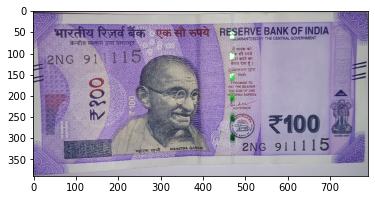

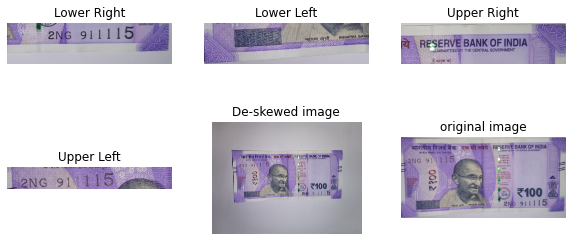

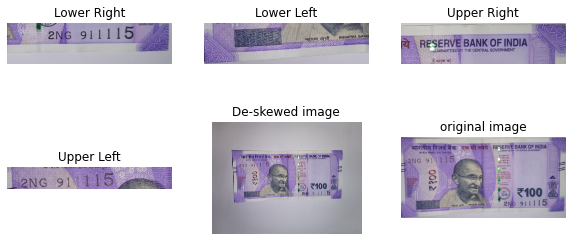

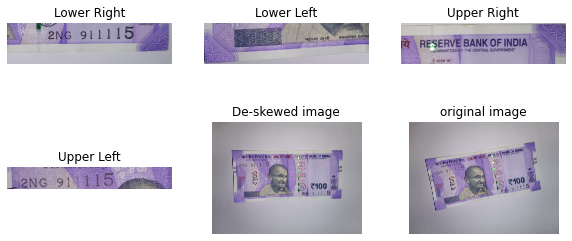

In [14]:
# MASTER WHILE
variable_for_master_while = 0
global overall_single_iteration_status
global overall_excemption_occured_or_not

while variable_for_master_while == 0:
    overall_excemption_occured_or_not = 0
    overall_single_iteration_status = 0
    print(" ")
    print("\n_______________________________________________________________________________________________")
    print("* c or C to Check no of Notes in Machine")
    print("* y or Y to RUN")
    print("* n or N to Temporary Halt")
    print("* END to Terminate Permanently")
    print("_________________________________________________________________________________________________")
    master_condition = str(input("ENTER CONDITION | ")[0])
    
    # EXECUTE
    if (master_condition == "y") or (master_condition == "Y"): 
        billing_input()
        if total_value_of_bank_notes_given > 0:
            overall_single_iteration_status = overall_single_iteration_status + 1
        if billing_value !=0 and total_value_of_bank_notes_given != 0:
            
            #master_initiate(value, saved_value_index, total_amount, billing_value, total_value_of_bank_notes_given)
            var_for_initiate_master_initiate_func = 0
            if (overall_single_iteration_status > 0):
                def ML_and_OCR():
                    DB_bank_note_denomination = []
                    DB_bank_note_Sno = []
                    
                    Bank_Note_Count = 1
                    for i in range(Bank_Note_Count):
                        captured_denomination = Final_Prediction("100_re_skew.jpg")
                        captured_serial_number = SERIAL_NUMBER_EXTRACTION("100_re_skew", 1) # MASTER MODULE FUNCTION CALL
                    
                        DB_bank_note_denomination.append(str(captured_denomination))
                        DB_bank_note_Sno.append(str(captured_serial_number))
                    print(DB_bank_note_denomination, DB_bank_note_Sno)
                    return DB_bank_note_Sno, DB_bank_note_denomination
                
                Func_DB_bank_note_Sno, Func_DB_bank_note_denomination = ML_and_OCR()
                
                pre_STOLLEN_CONDITION = pre_SQL_illicit_record(Func_DB_bank_note_Sno, Func_DB_bank_note_denomination)
                if pre_STOLLEN_CONDITION > 0:
                    var_for_initiate_master_initiate_func = var_for_initiate_master_initiate_func + 1
                else:
                    pass
                if var_for_initiate_master_initiate_func == 0:
                    print("##############################")
                    master_initiate(value, saved_value_index, total_amount, billing_value, total_value_of_bank_notes_given) 
                else:
                    pass                
                
                if overall_excemption_occured_or_not == 0:
                    a, b, c = Func_DB_bank_note_Sno, Func_DB_bank_note_denomination, denomination_variable
                    DB_billing_value = billing_value
                    DB_total_value_of_bank_notes_given = total_value_of_bank_notes_given
                    STOLLEN_CONDITION, STOLLEN_SERIAL_NUMBER = SQL_DATABASE_CONNECT(a, b, c) # SQL data check and entry
                    #SQL_Transaction_Log(Transaction_data) # SQL transaction entry
                    current_date, current_time, suspect_image_cpatured, current_address, image_path = ENVIRONMENT_DATA_GATHERING(STOLLEN_CONDITION)
                    TRANSACTION_LOG(STOLLEN_CONDITION, STOLLEN_SERIAL_NUMBER, current_date, current_time, DB_billing_value, DB_total_value_of_bank_notes_given, image_path)                

                

                
        elif (billing_value == 0) or (total_value_of_bank_notes_given == 0):
            print("------------------------------------------------------------------------# ERROR #------")
            print("\t MESSAGE: PLEASE INPUT PROPER VALUE FOR FURTHER BILLING PROCESS \n \t TRY: above zero")
            print("---------------------------------------------------------------------------------------")
    
    # PASS and LOOP
    elif (master_condition == "n") or (master_condition == "N"):
        #global END_REVENUE, END_no_TRANSACTIONS
        print("_______________________________________________________________________________________________")
        sleep()
        print("_______________________________________________________________________________________________")
        
    # CHECK
    elif (master_condition == "c") or (master_condition == "C"):
        total  = 0
        for i in range(len(saved_value_index)):
            temp = value[i] * saved_value_index[i]
            total = total + temp
        print("\n\t BANK NOTES AVAILABLE IN THE MACHINE = ", saved_value_index)
        print(" ")
        for i in range(len(saved_value_index)):
            print("\t", saved_value_index[i], "note of", value[i])
        print("\n\t Total value available =", total, "Rupees")
    
    # MASTER TERMINATE
    # DELETE all variables to free up memory
    elif master_condition == "E":
        pin, str_pin = pin_function()
        try:
            pin_input = int(input("ENTER 4 digit SECURITY PIN | "))
            pin_input_string = str(pin_input)
            assert len(pin_input_string) == len(str_pin)
        except ValueError:
            print("------------------------------------------------------------------------# ERROR #------")
            print("\t MESSAGE: ERROR DETECTED | expected integer value")
            print("---------------------------------------------------------------------------------------")
            del(pin, str_pin)
            continue
        except AssertionError:
            print("------------------------------------------------------------------------# ERROR #------")
            print("\t MESSAGE: ERROR DETECTED | expected 4 digit")
            print("---------------------------------------------------------------------------------------")
            del(pin, str_pin)
            continue
        else:
            pass
        
        if pin_input == pin:
            print("Confirm once again | type: 'END'")
            confirm_end = input()
        
            if confirm_end == "END":
                print("\n_______________________________________________________________________________________________")
                print("PROGRAM ENDED, ALL VARIABLES ARE DELETED")
                #global END_REVENUE, END_no_TRANSACTIONS
                print("\n\t NUMBER OF SUCCESSFULL TRANSACTIONS DONE |", END_no_TRANSACTIONS)
                print("\t TOTAL REVENUE THROUGHT THE DAY |", END_REVENUE)
                print("_______________________________________________________________________________________________")
                print("\t\tPROGRAM TERMINATED")
                time.sleep(10)
                for name in dir():
                    if not name.startswith('_'):
                        del globals()[name] 
                break
            else:
                print("------------------------------------------------------------------------# ERROR #------")
                print("\t MESSAGE: Condition not entered correctly | Redirected to previous")
                print("---------------------------------------------------------------------------------------")
                continue   
        else:
            print("------------------------------------------------------------------------# ERROR #------")
            print("\t MESSAGE: INCORRECT PIN | Redirected to previous")
            print("---------------------------------------------------------------------------------------")
            continue
        
    else:
        print("------------------------------------------------------------------------# ERROR #------")
        print("\t MESSAGE: Please input valid condition") 
        print("---------------------------------------------------------------------------------------")

# MEMORY usage 
#process = psutil.Process(os.getpid())
#print("Memory used", int(process.memory_info().rss/1e+6),"MB")  # in bytes 

# SELECT

In [ ]:
print("ILLICIT______________________________________________________________\n")
# SELECT
mycursor.execute("SELECT * FROM trial_illicit")
myresult = mycursor.fetchall()
#print(myresult)
for x in myresult:
  print(x)

print("\nLEGITIMATE_________________________________________________________\n")
# SELECT
mycursor.execute("SELECT * FROM trial")
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

print("\nDATA LOG___________________________________________________________\n")
print(SQL_data_insertion_log, SQL_total_row_count)

print("\nTRANSACTION LOG____________________________________________________\n")
# SELECT
print("Location, Date, Time, BillValue_ByMerchant, TotalValue_ByCustomer, ImageAddress, SuspeciousCondition, TransactionState")
mycursor.execute("SELECT * FROM Transation_log")
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

# DROP

In [29]:
import mysql.connector
try:
    mydb = mysql.connector.connect(
      host="localhost",
      user="kevindaniel",
      password="123456789"
    )
    mycursor = mydb.cursor()
    #mycursor.execute("CREATE DATABASE mydatabase")
    mydb = mysql.connector.connect(
      host="localhost",
      user="kevindaniel",
      password="123456789",
      database="mydatabase"
    )
    mycursor = mydb.cursor()
    
    # Illicit
    sql = "DROP TABLE trial_illicit"
    mycursor.execute(sql)
    
    # Legitimate 
    sql = "DROP TABLE trial"
    mycursor.execute(sql)
    
    # Transaction
    sql = "DROP TABLE Transation_log"
    mycursor.execute(sql)
except:
    print("ERROR | Table Already Exists")
else:
    print("Table Deletion Success")

# ILLICIT UPDATE

In [17]:
# INSERT

query = "INSERT INTO trial_illicit (Hundred) VALUES ('2NG911115')"
query_str = str(query)
mycursor.execute(query_str)
mydb.commit()
print("record inserted, ID:", mycursor.lastrowid)

record inserted, ID: 1


In [ ]:
# UPDATE

query = "UPDATE trial_illicit SET Ten = 'stollen2' WHERE ROW_NO = 1"
query_str = str(query)
mycursor.execute(query_str)
mydb.commit()
print(mycursor.rowcount, "record(s) affected")

In [9]:
    def image_capture():
        videoCaptureObject = cv2.VideoCapture(0)
        condition = True
        while(condition):
            ret,one_frame = videoCaptureObject.read()
            #cv2.imwrite("Suspect_Image.jpg",one_frame)
            condition = False
        #videoCaptureObject.release()
        #cv2.destroyAllWindows()
        #os.remove("C:/Users/kevin/Suspect_Image.jpg")    
        return one_frame
image_capture()

array([[[151, 173, 176],
        [149, 171, 174],
        [147, 171, 175],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[152, 175, 175],
        [150, 173, 173],
        [149, 172, 172],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[151, 174, 174],
        [151, 174, 174],
        [149, 172, 170],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 47,  36,  44],
        [ 45,  34,  41],
        [ 50,  36,  47],
        ...,
        [ 99, 118, 123],
        [104, 117, 129],
        [105, 118, 131]],

       [[ 53,  36,  52],
        [ 52,  35,  50],
        [ 46,  37,  47],
        ...,
        [100, 119, 126],
        [102, 117, 129],
        [103, 118, 131]],

       [[ 52,  35,  50],
        [ 53,  36,  52],
        [ 48,  39,  49],
        ...,
        [102, 121, 128],
        [103, 118, 132],
        [102, 117, 131]]